## DBSCAN
### ( Density Based Spatial Clustering of Applications with Noise)

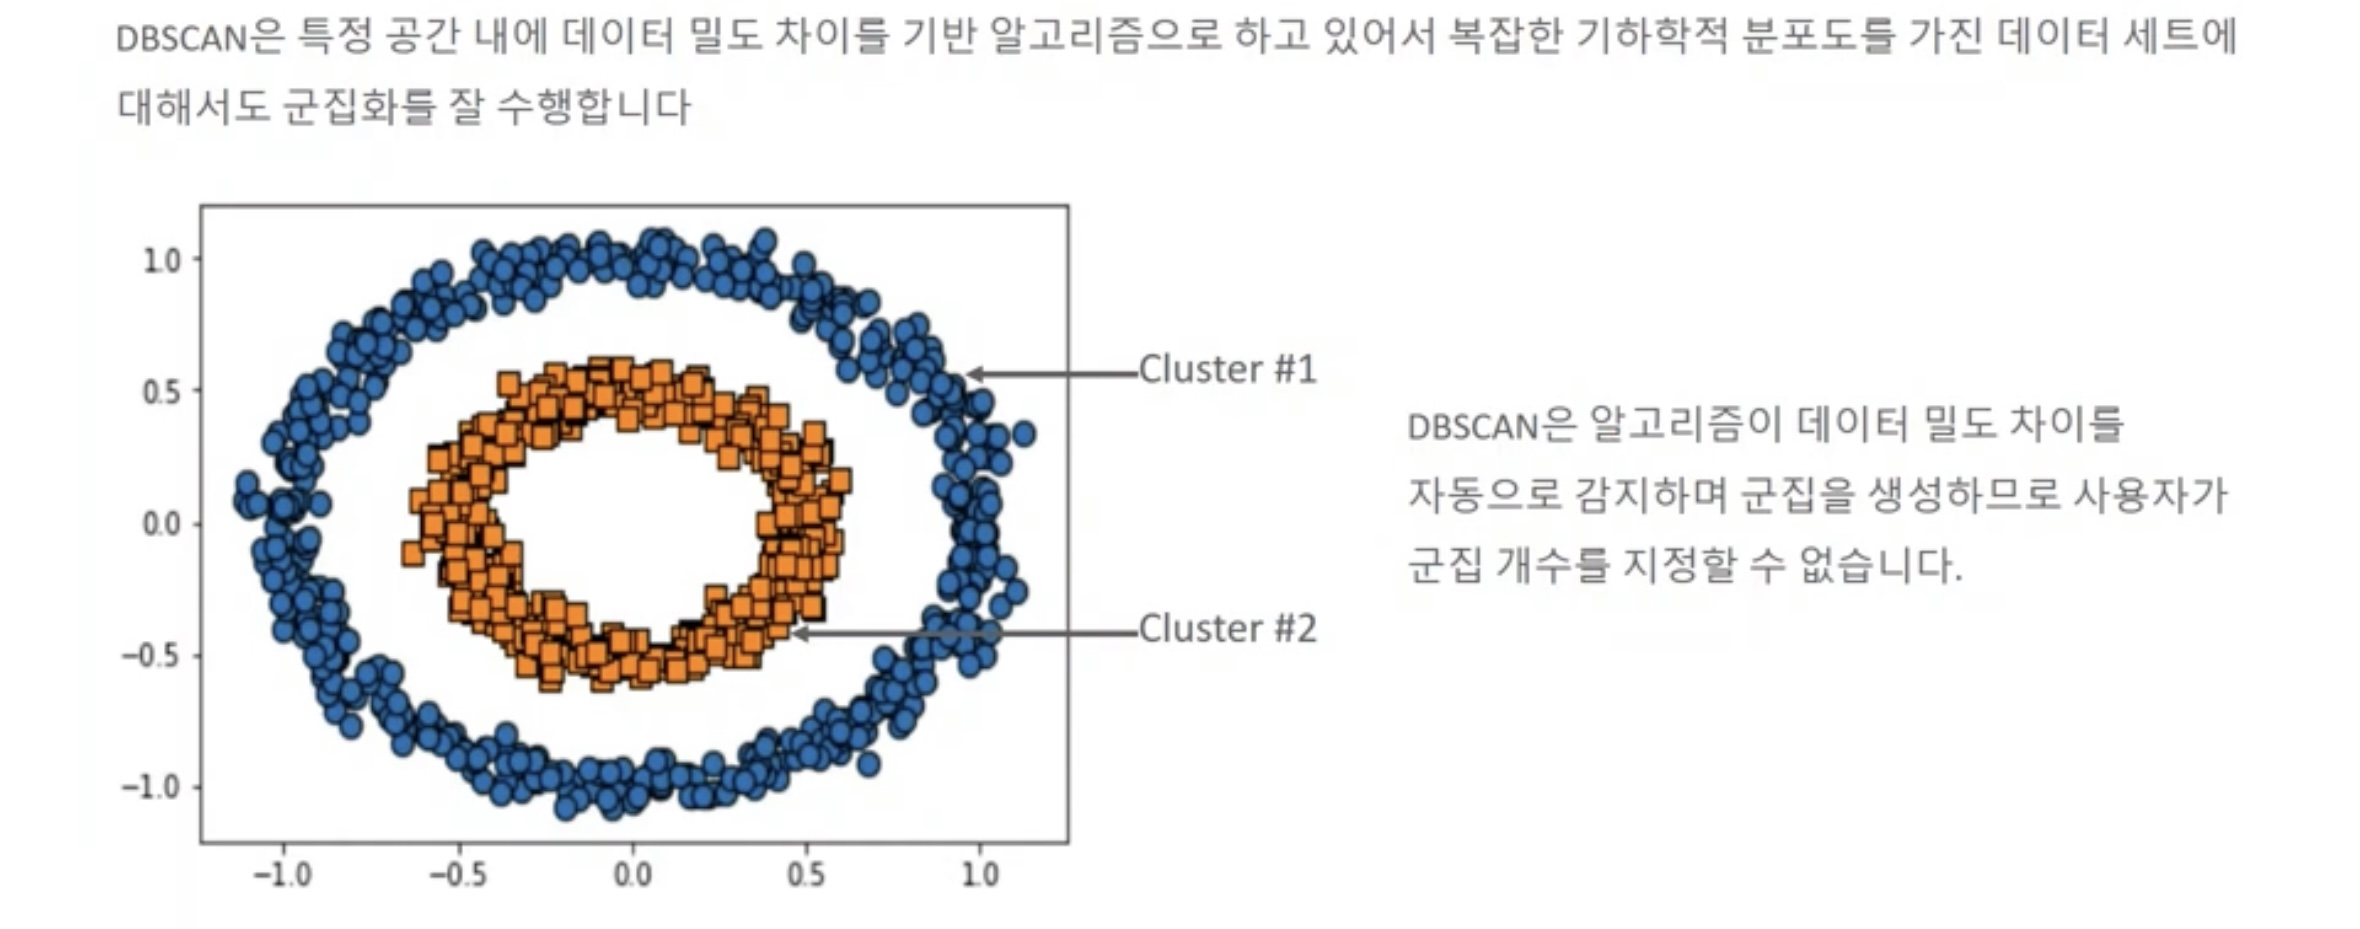

지정된 밀도 안에 속하지 못해 군집에 포함되지 못한 데이터는 잡음(noise) or 이상치(outlier)로 판단할 수 있으며, 이를 이용해 Anomaly detection에 활용할 수 있다. 

### 군집화 알고리즘별 비교 
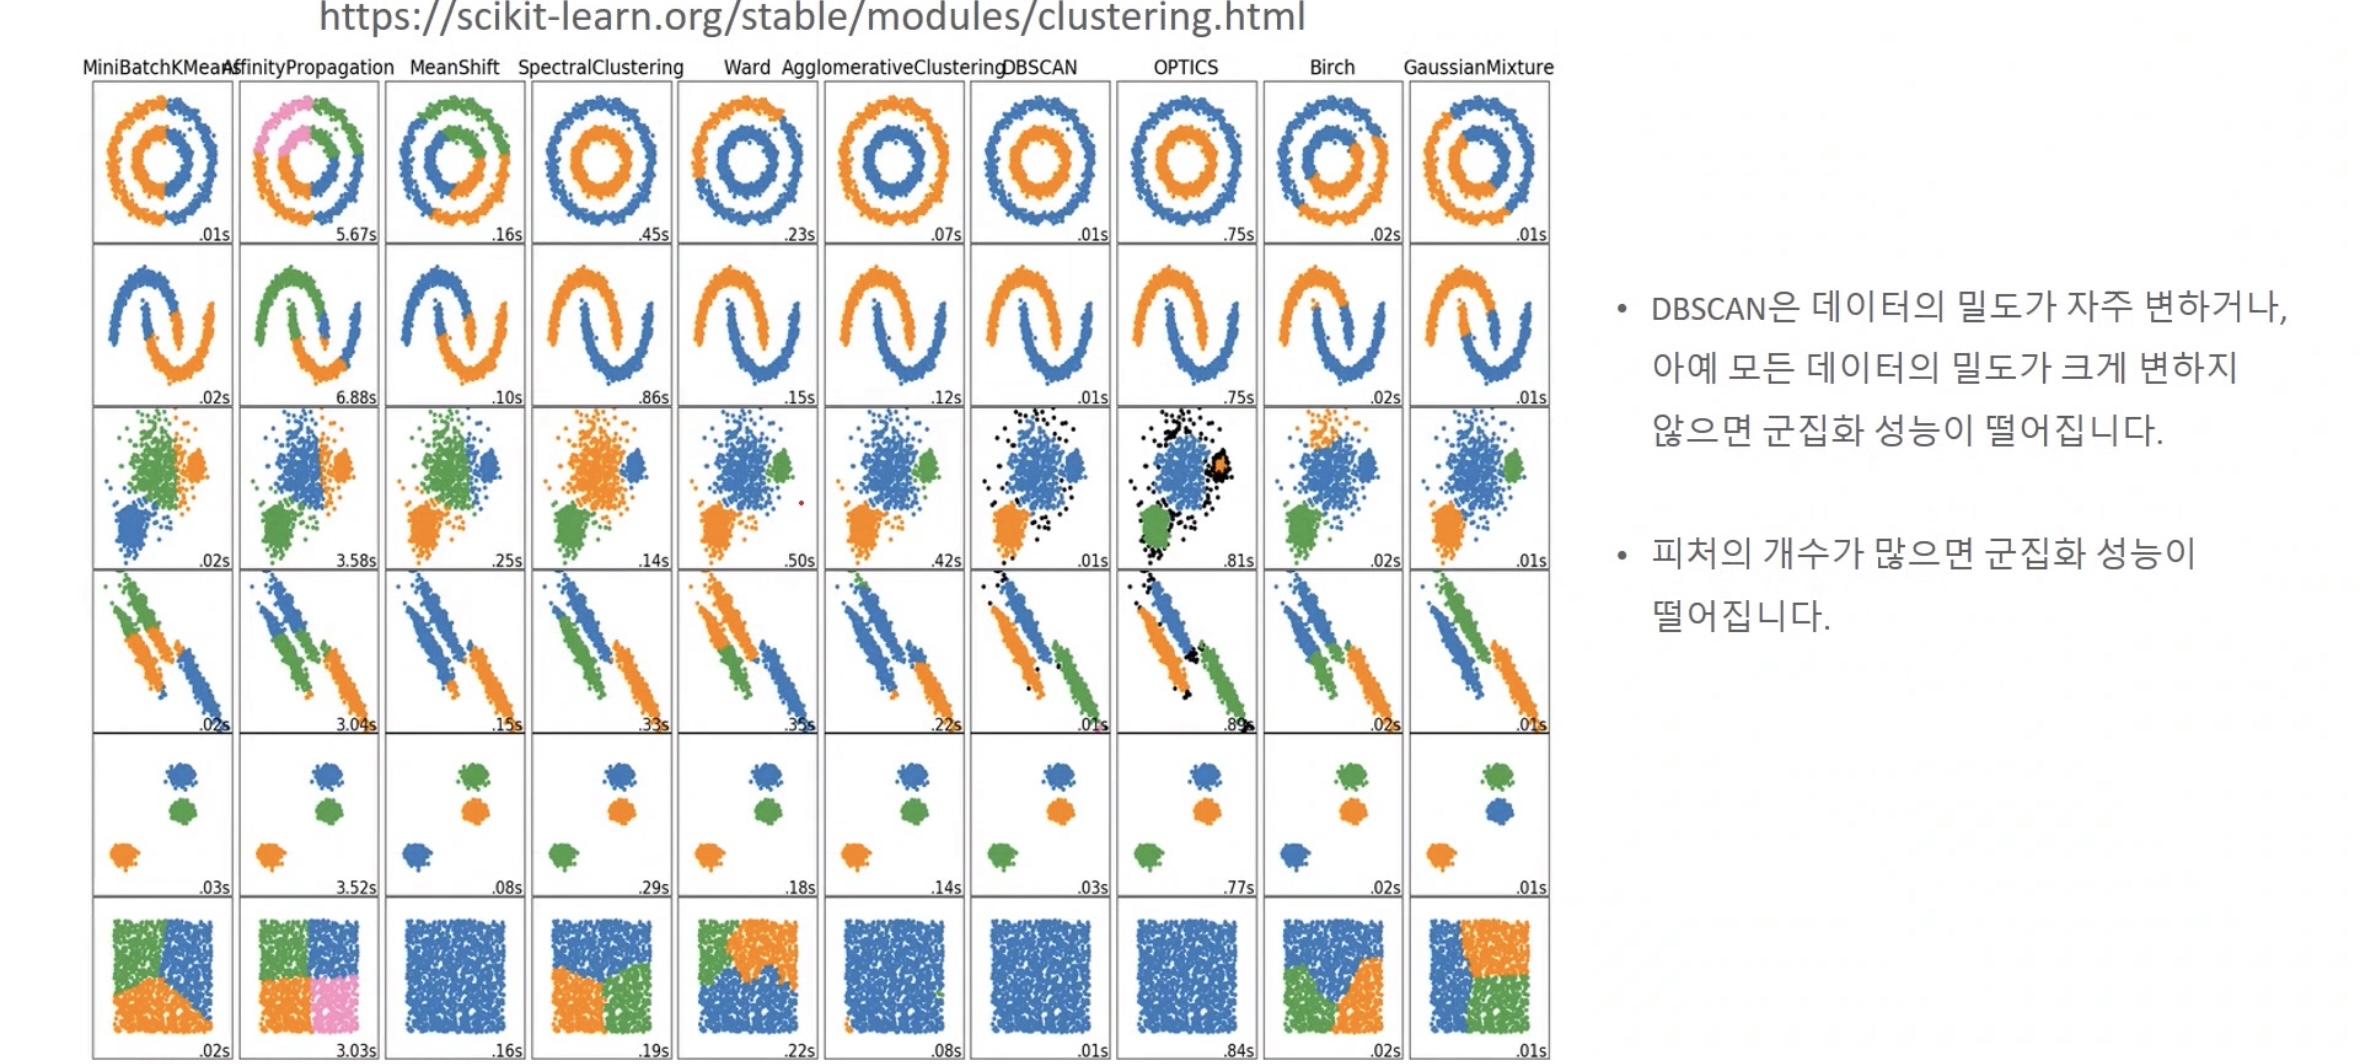

### DBSCAN vs K-Means 

- K-Means 군집은 생성할 군집의 수를 지정해주어야 하지만, DBSCAN은 군집의 수를 지정해주지 않아도 된다. 
- K-Means 알고리즘은 평균을 취하기 때문에 이상치에 민감하며, DBSCAN은 잡음점을 식별하므로 이상치에 민감하지 않다.(robust)


### DBSCAN 구성 요소

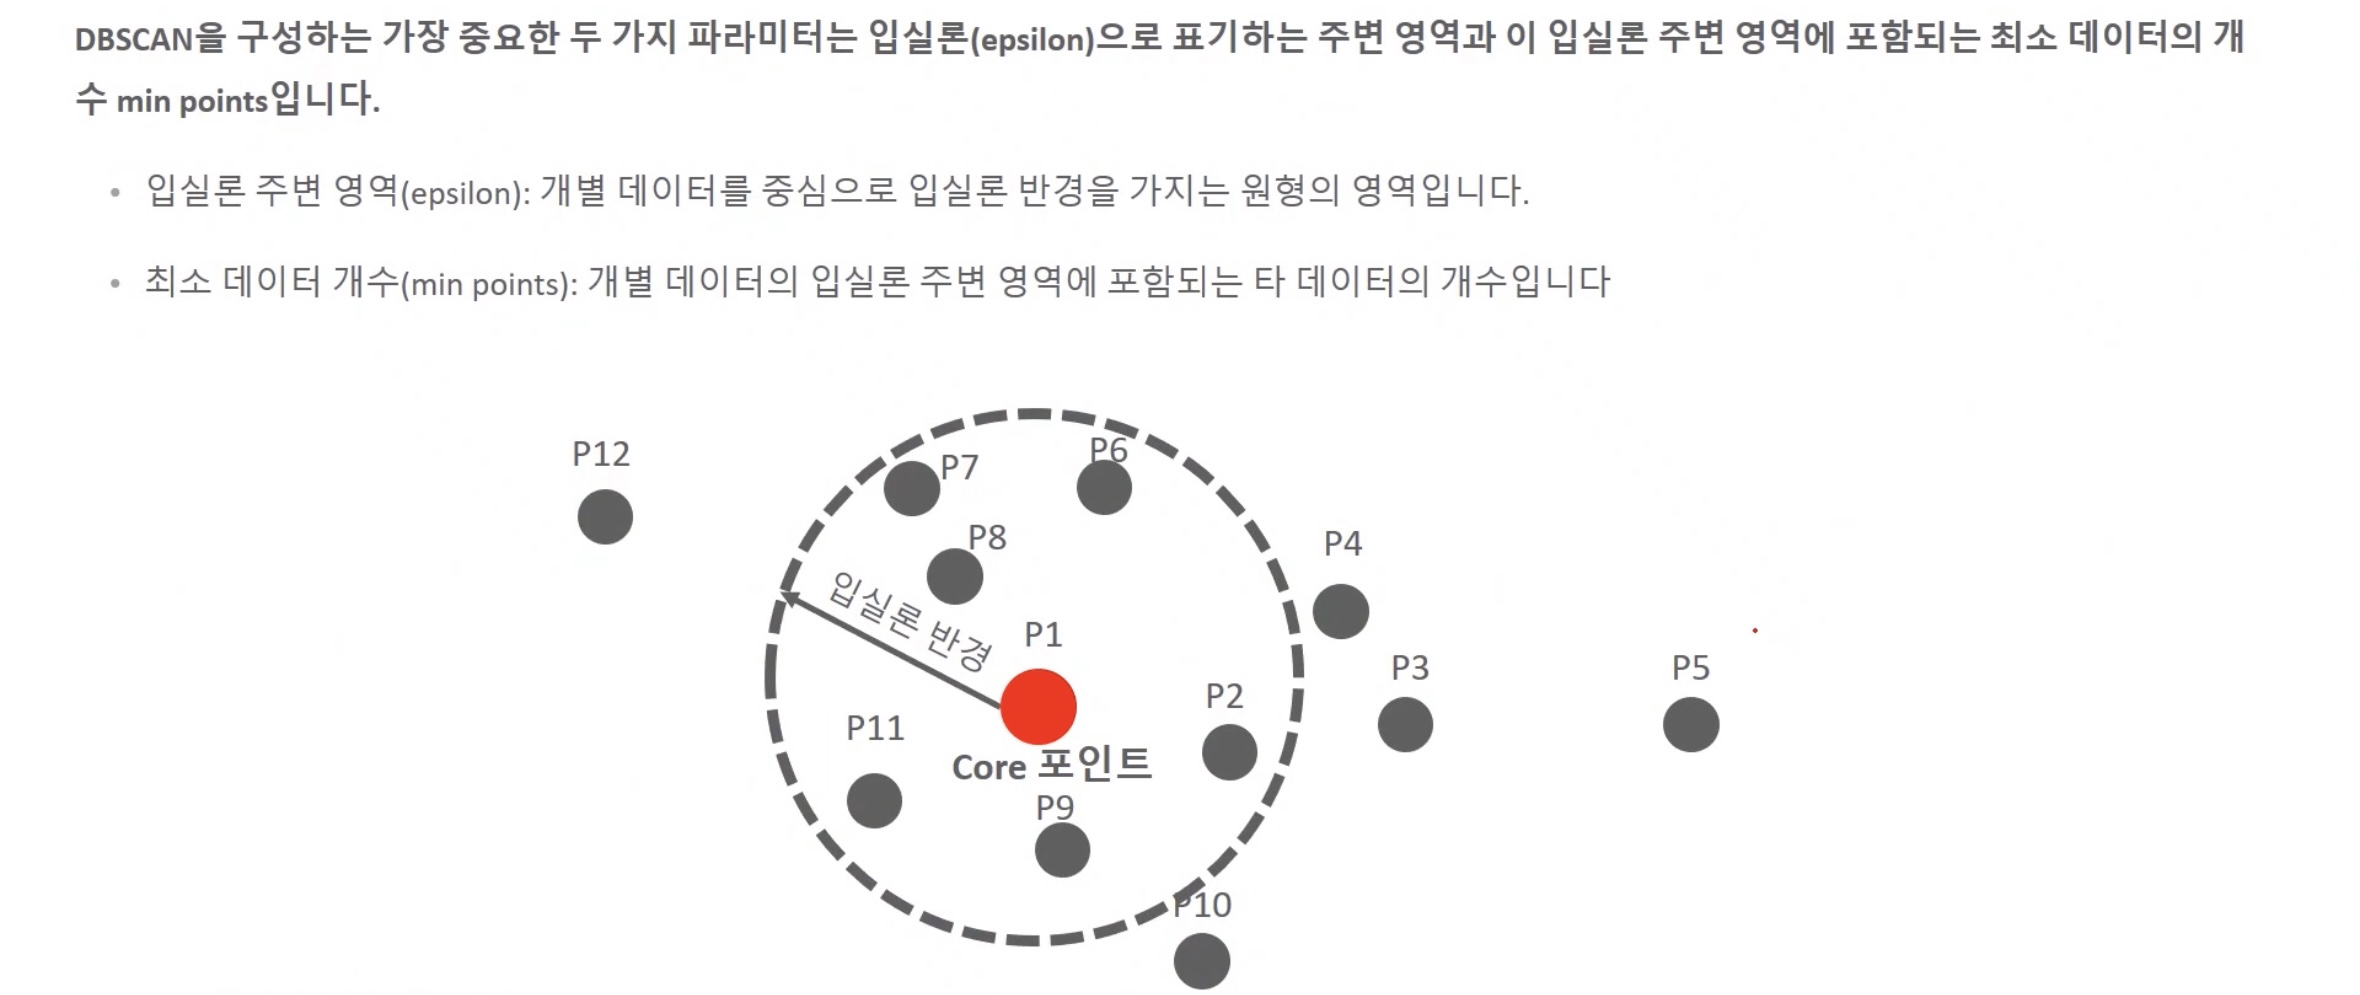

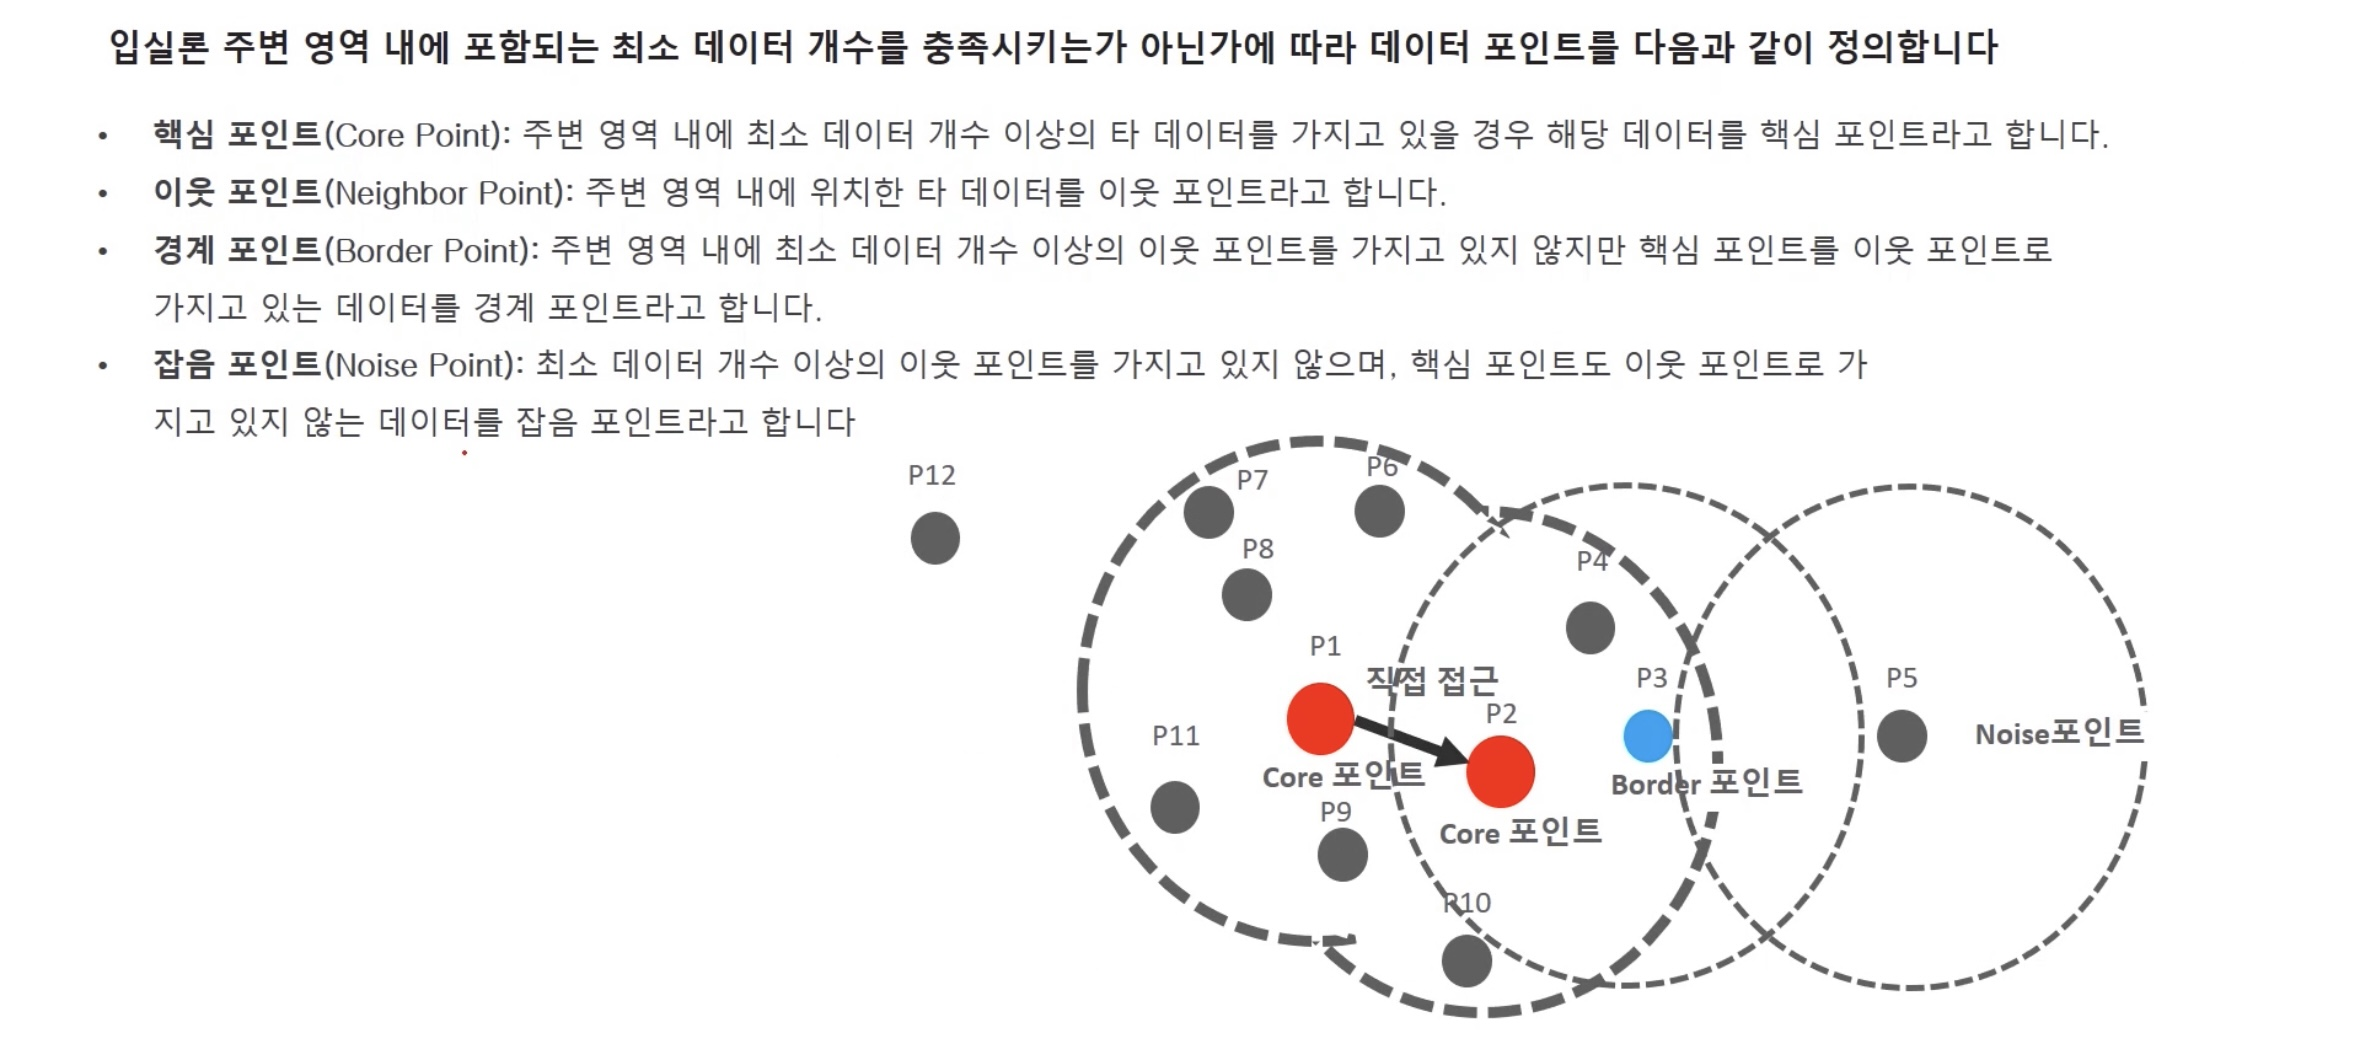

### DBSCAN 절차 1 
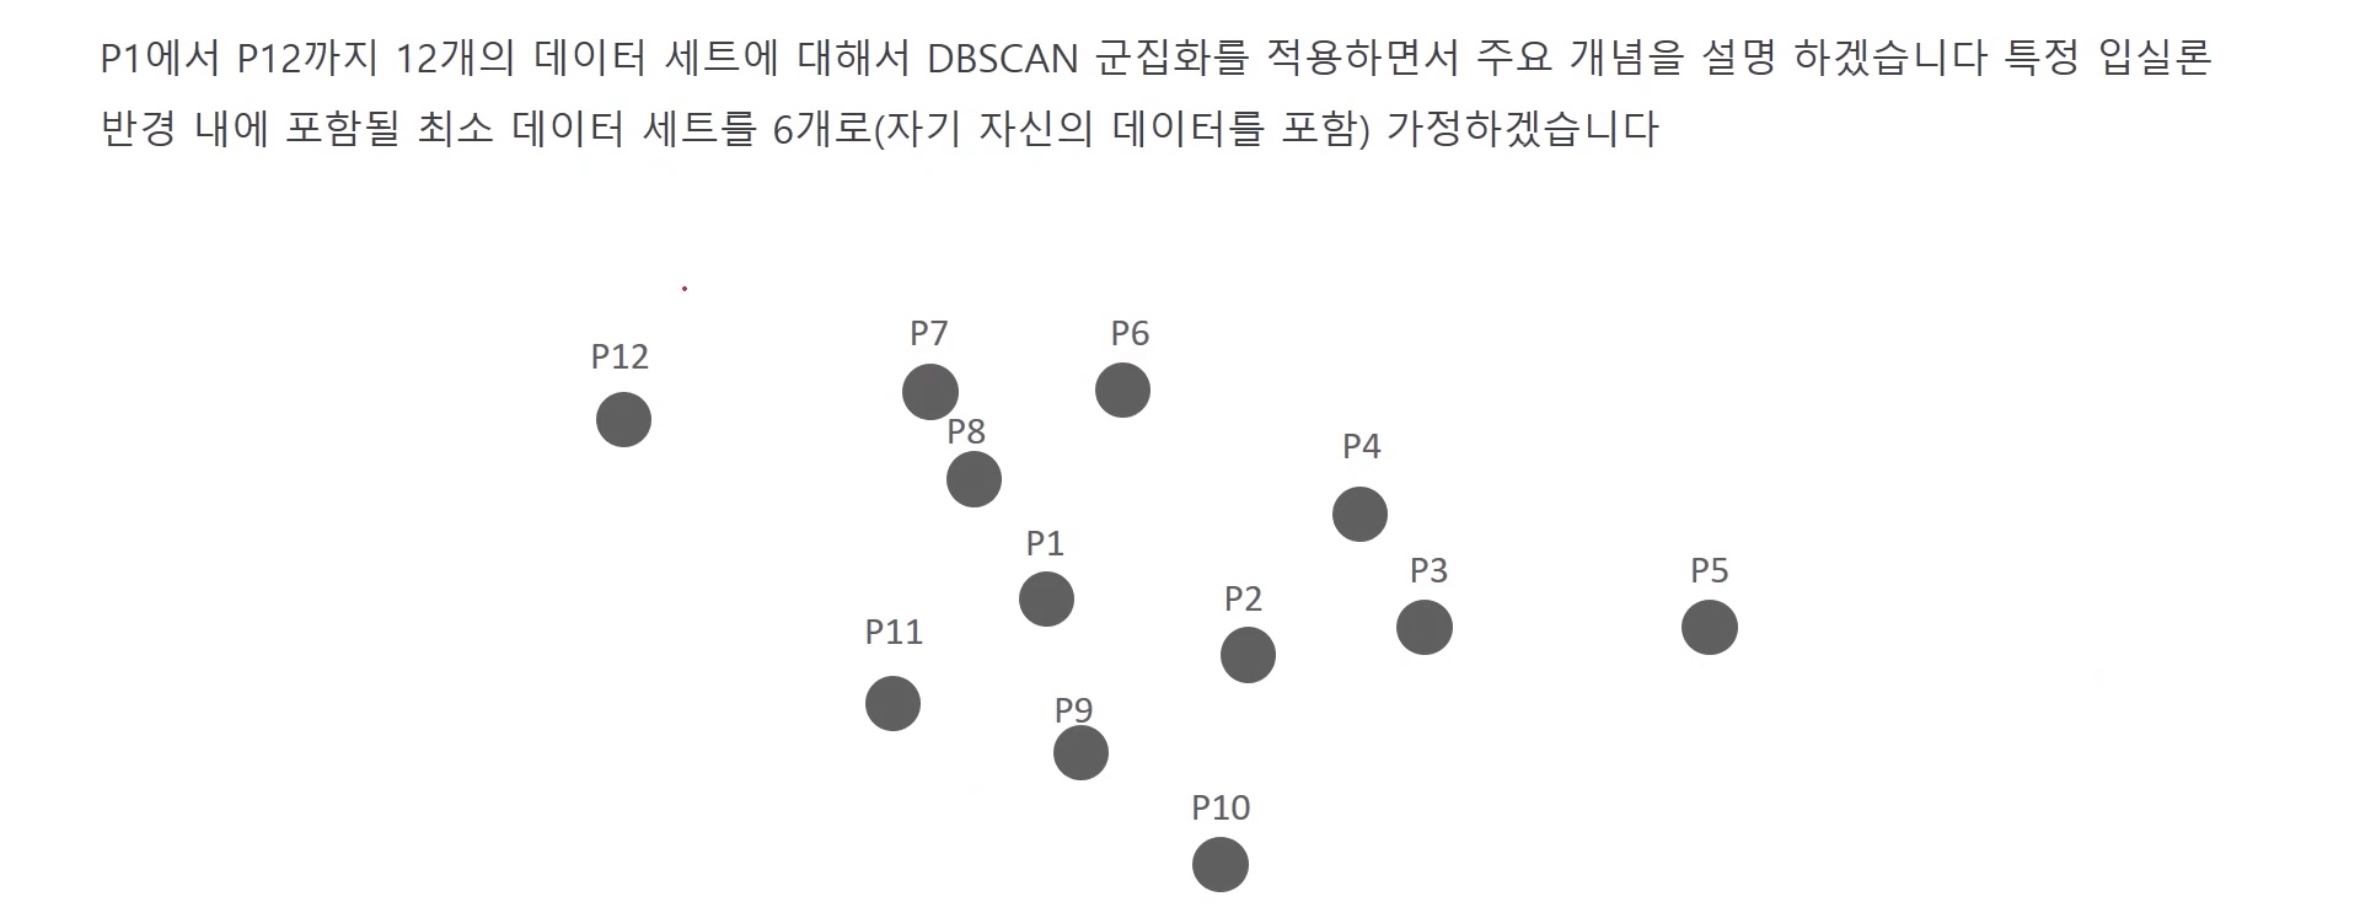

### DBSCAN 절차  2

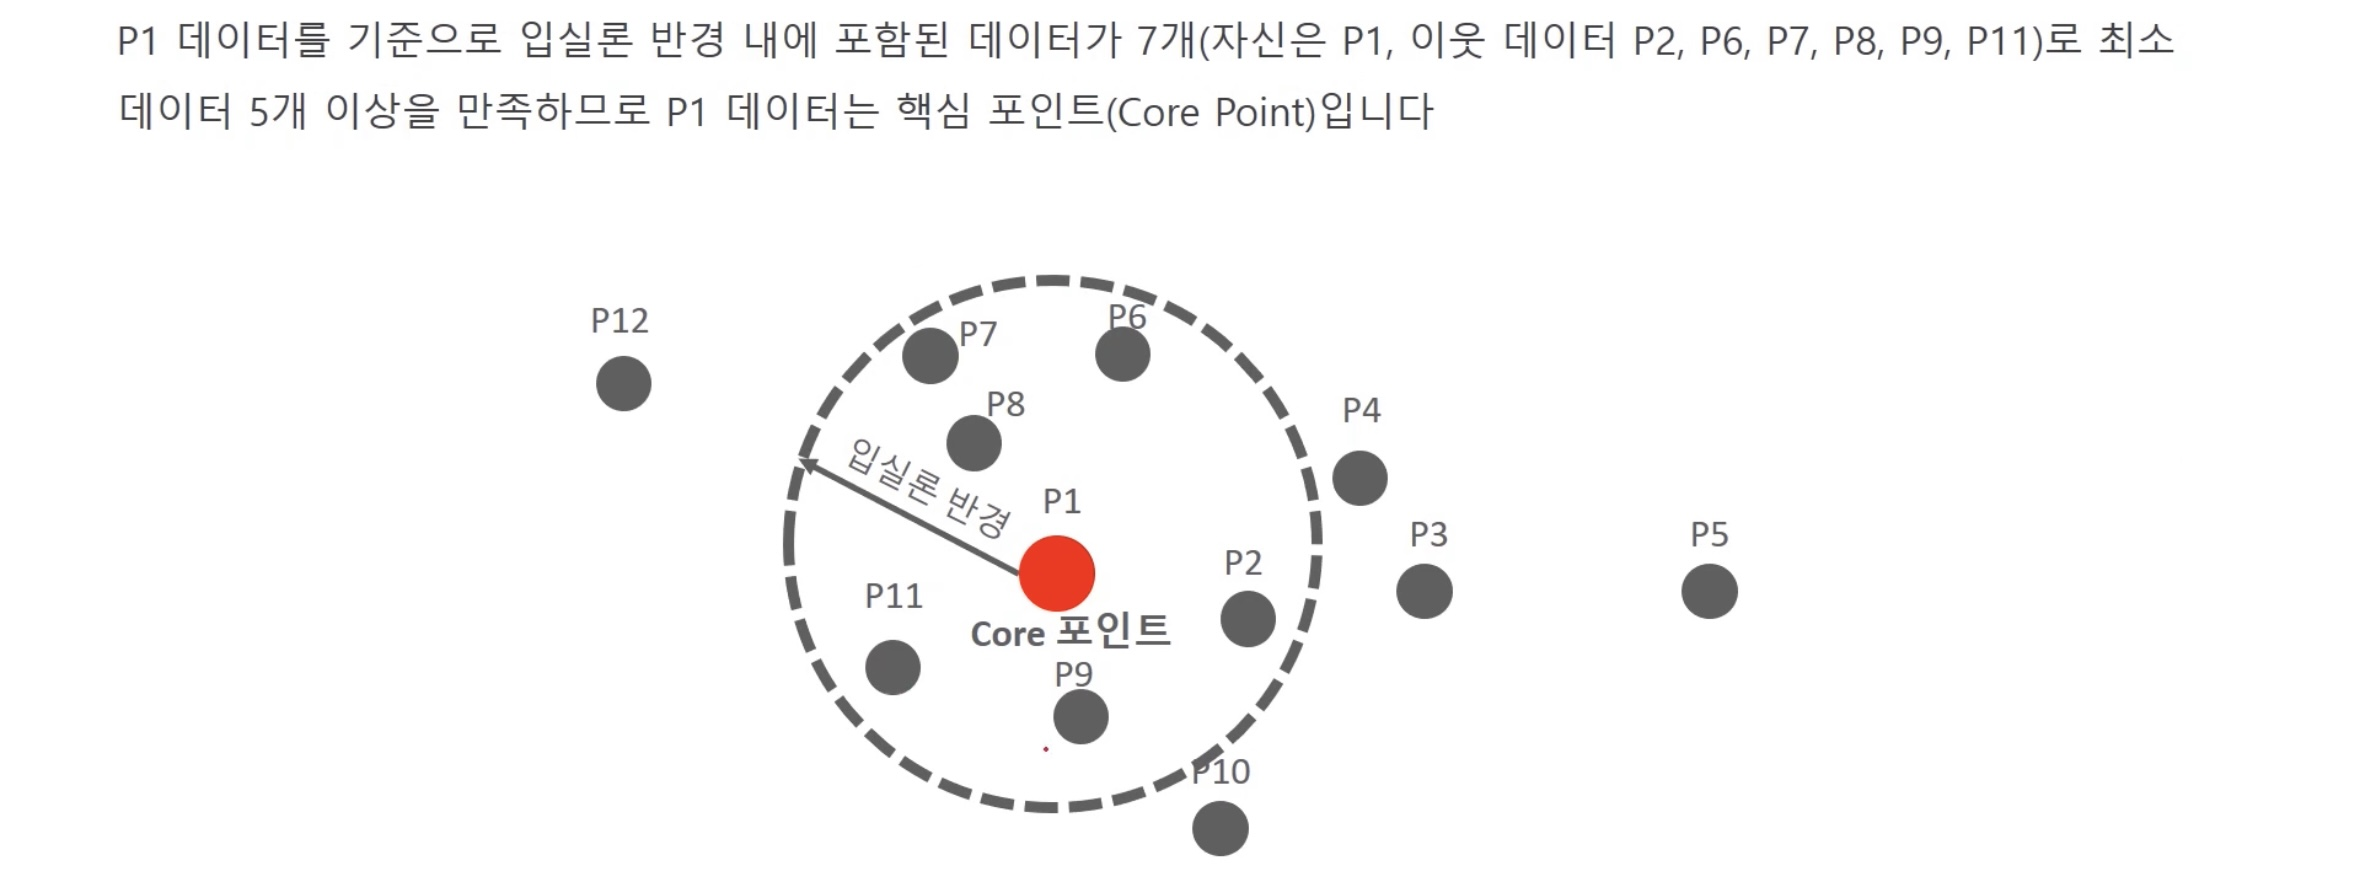

### DBSCAN 절차 3

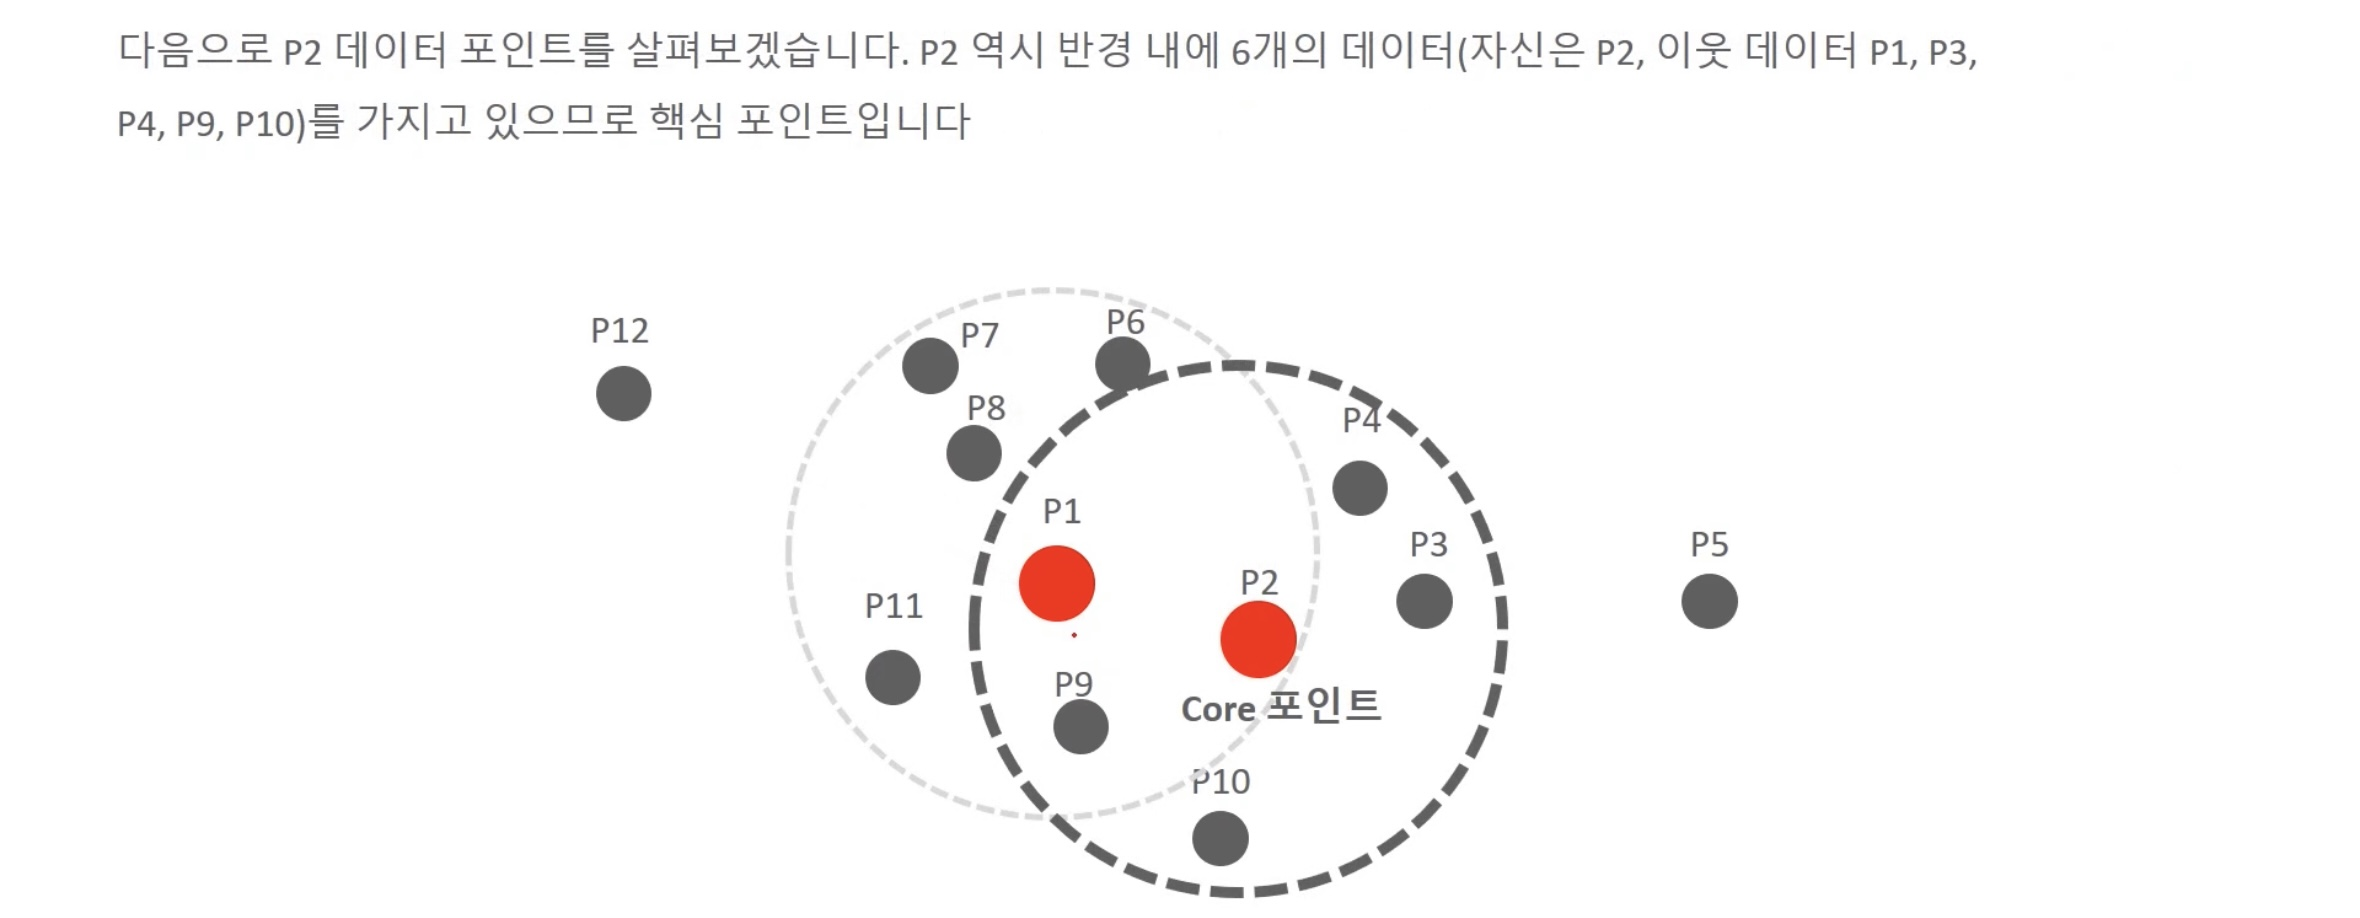

### DBSCAN 절차 4

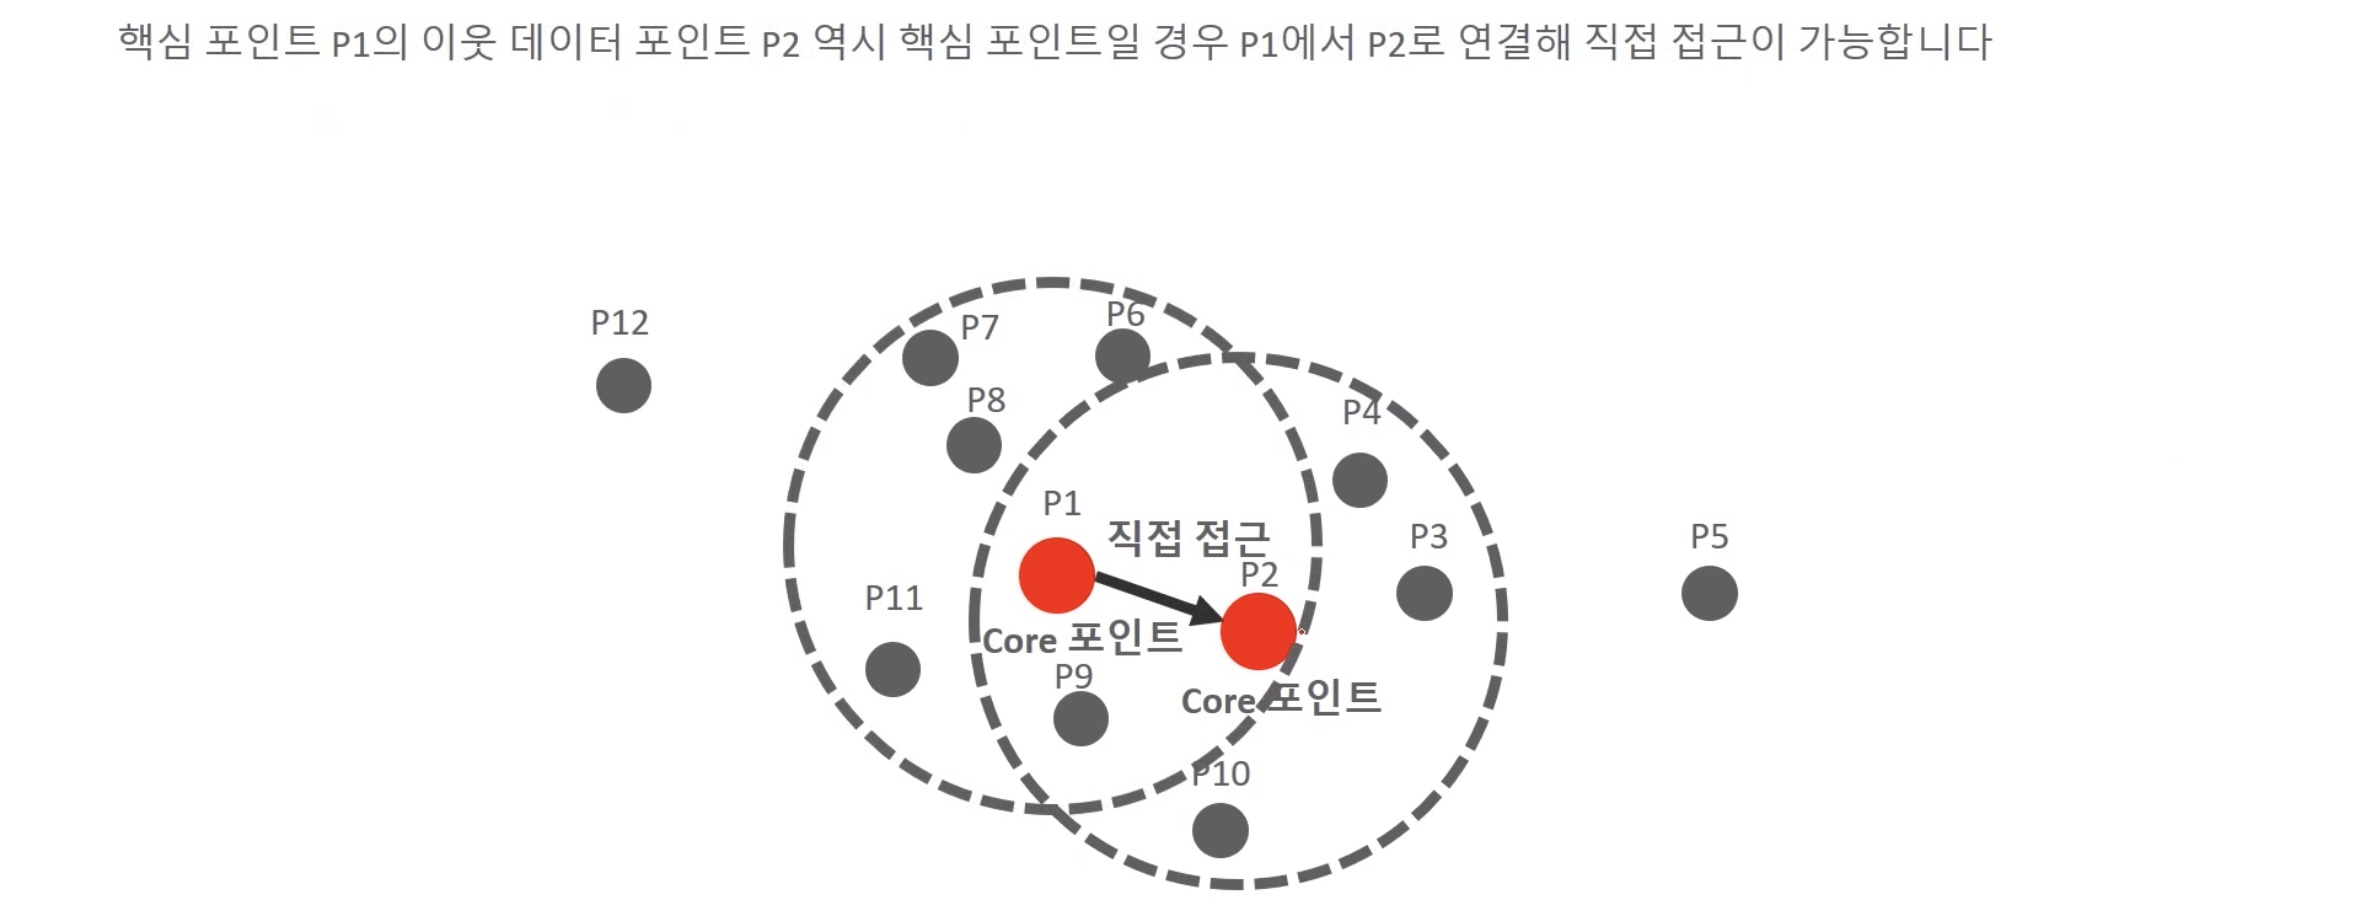

### DBSCAN 절차 5

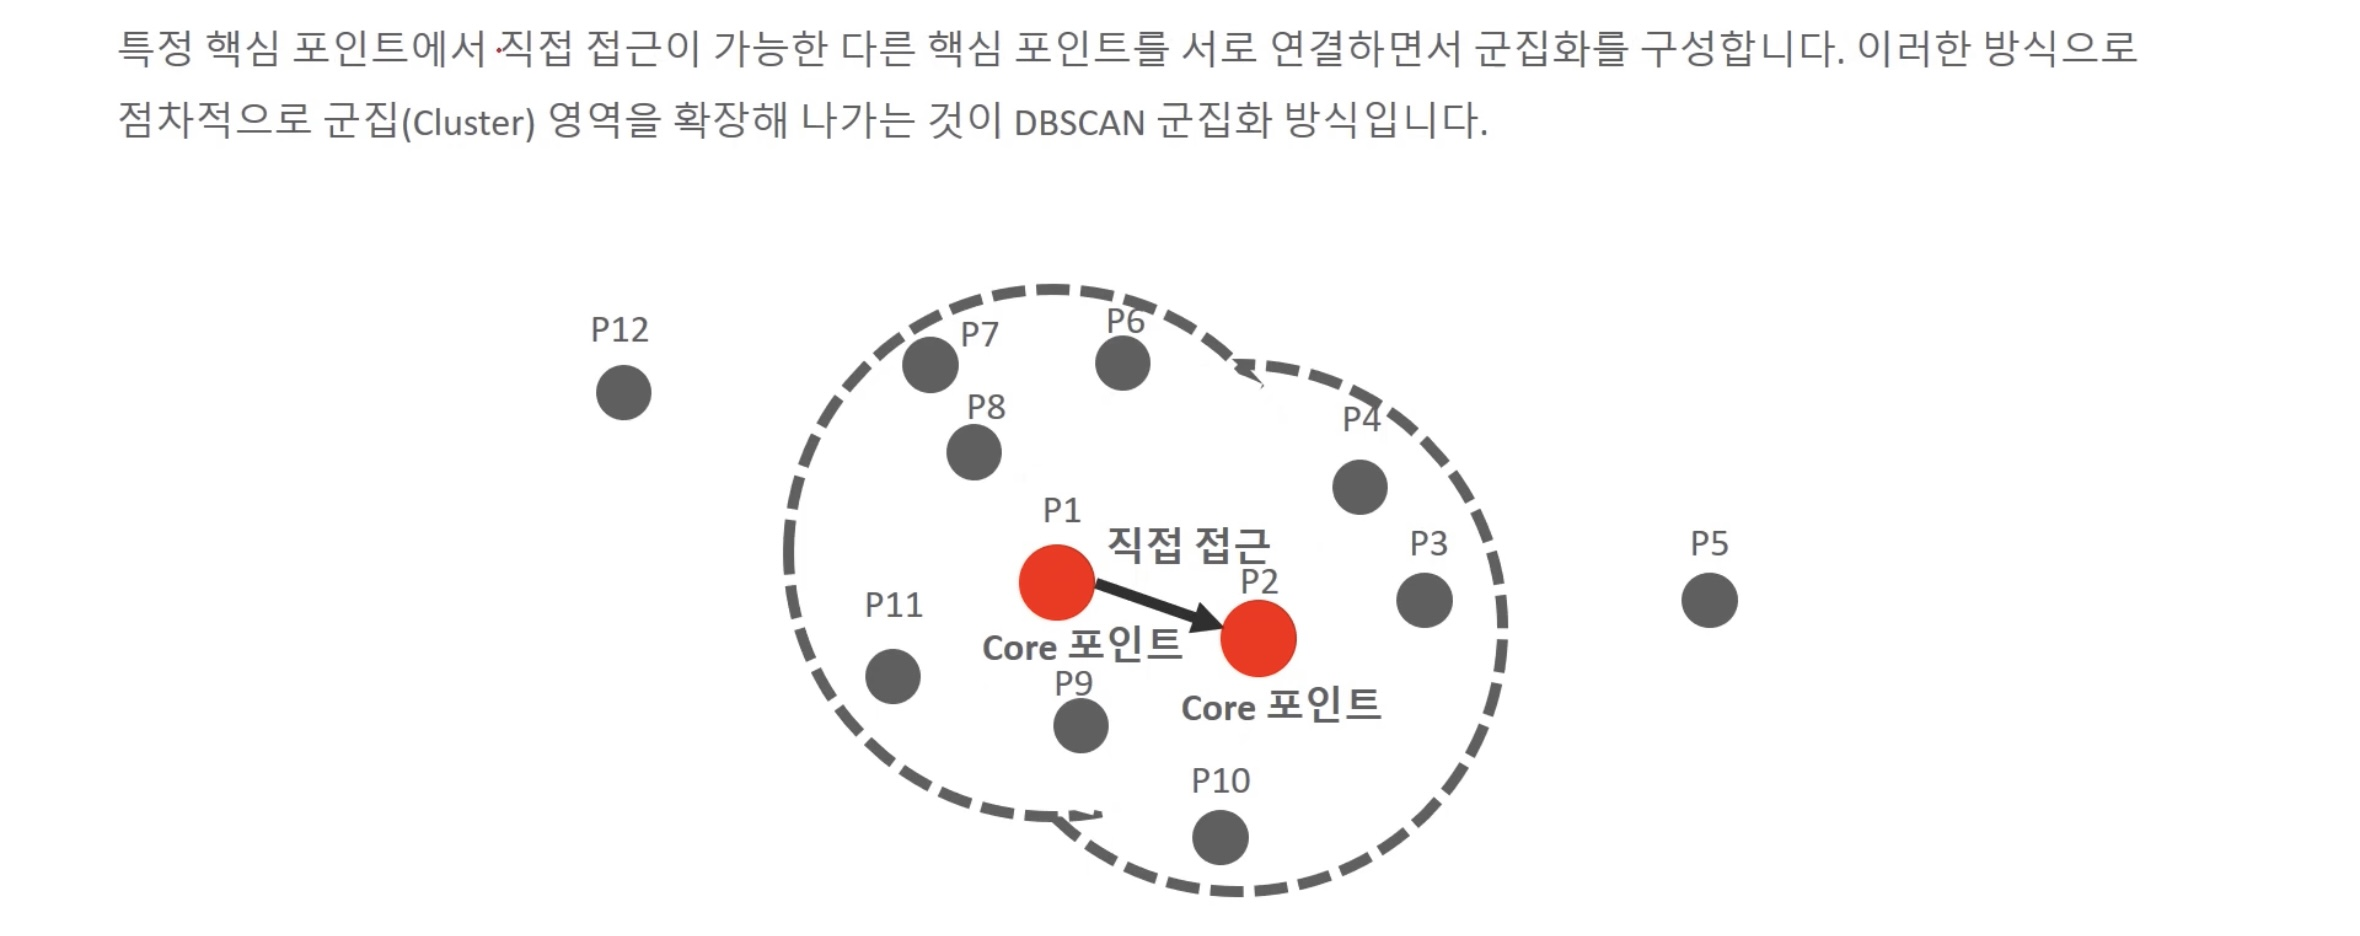

### DBSCAN 절차 6

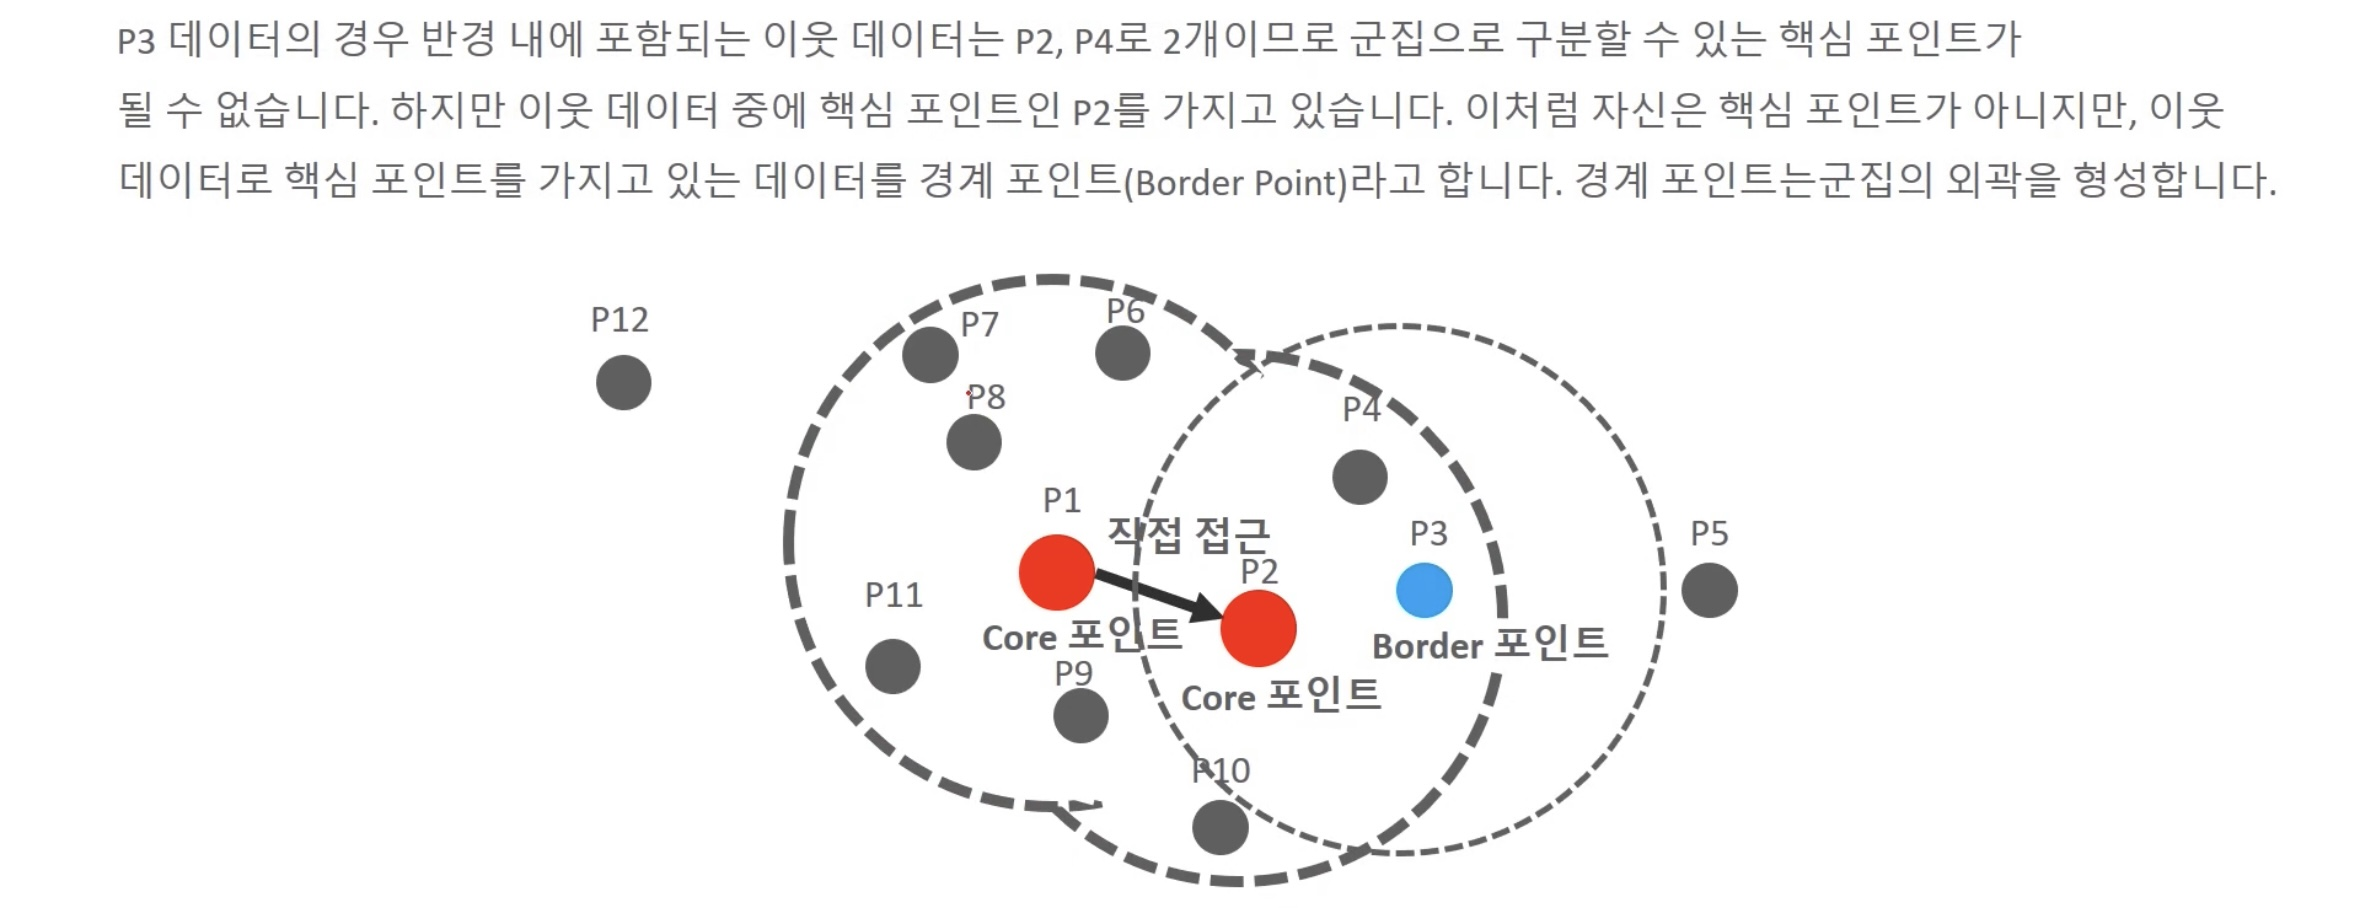

### DBSCAN 절차 7 
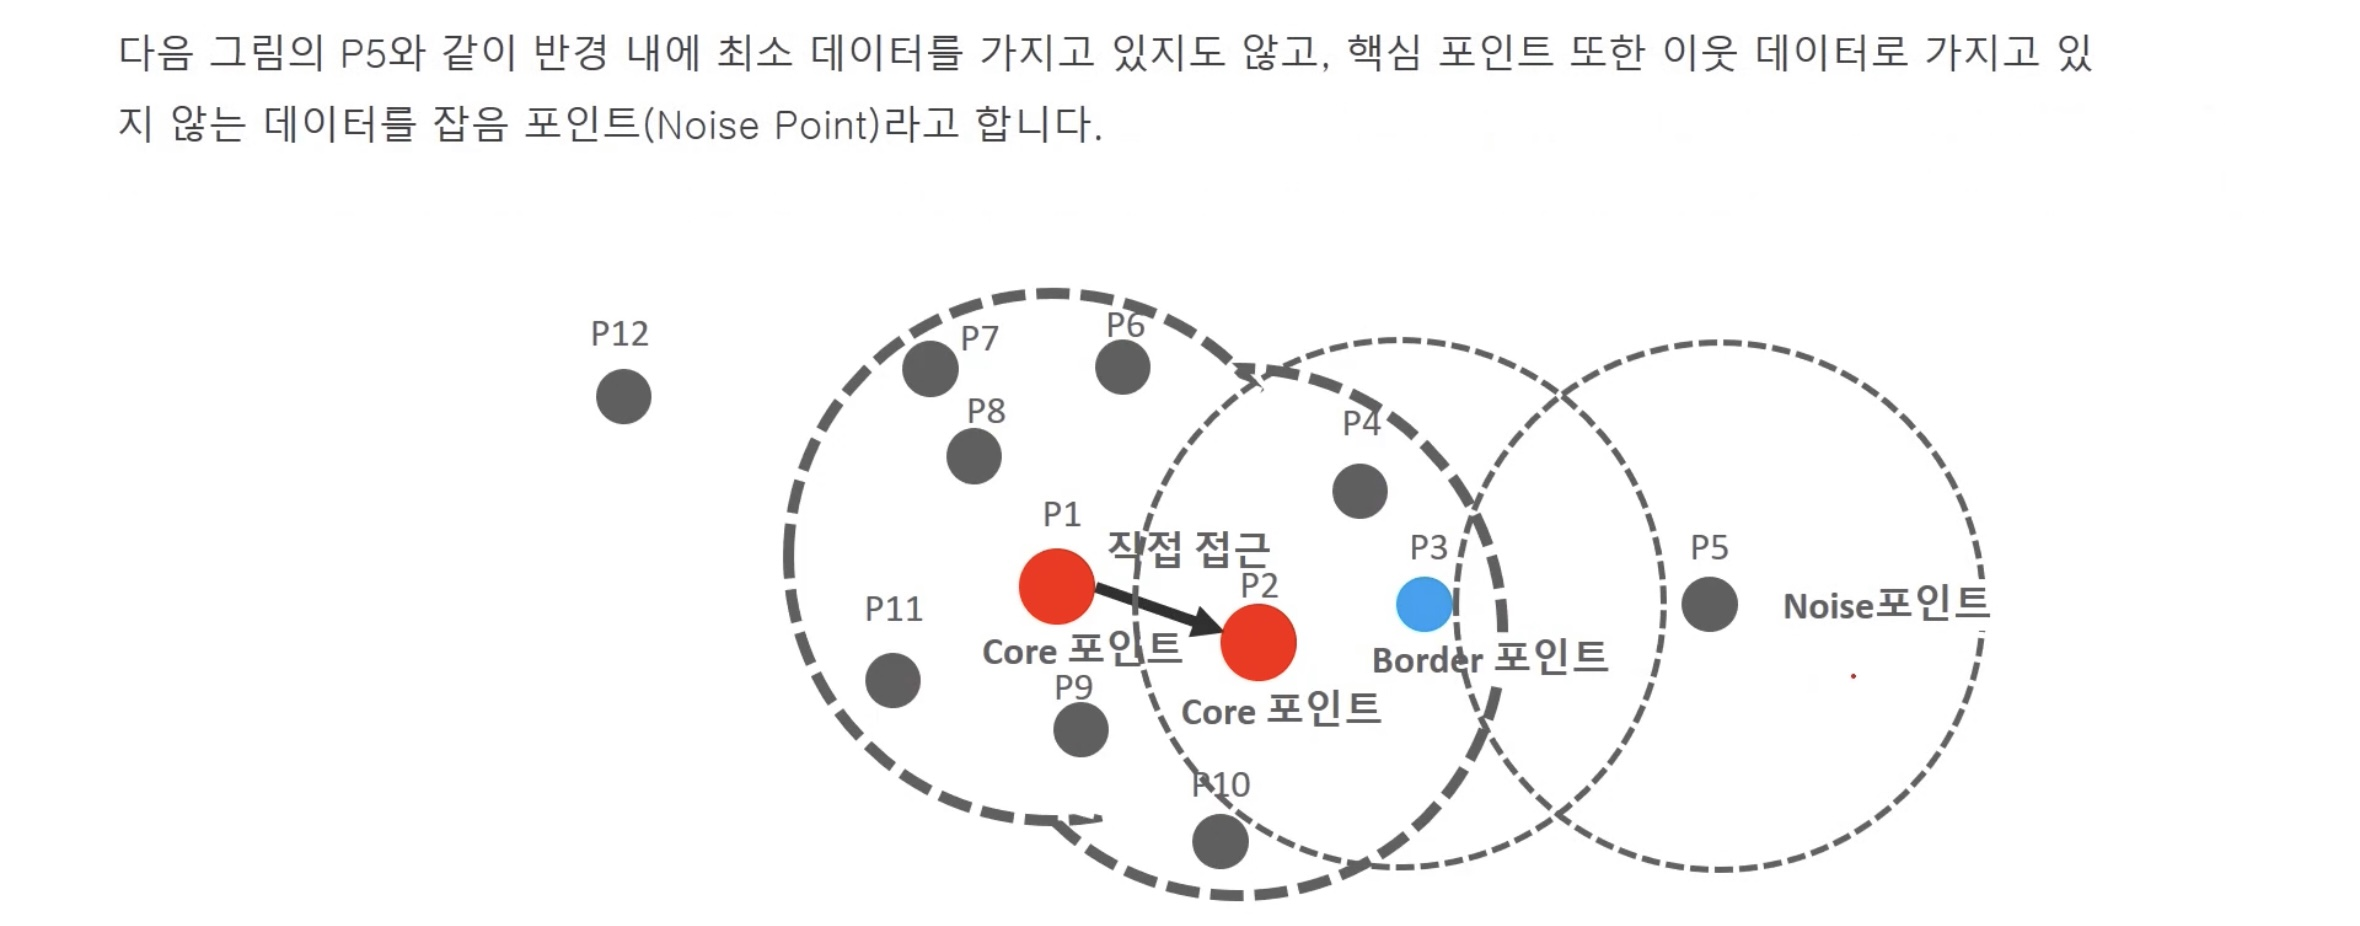


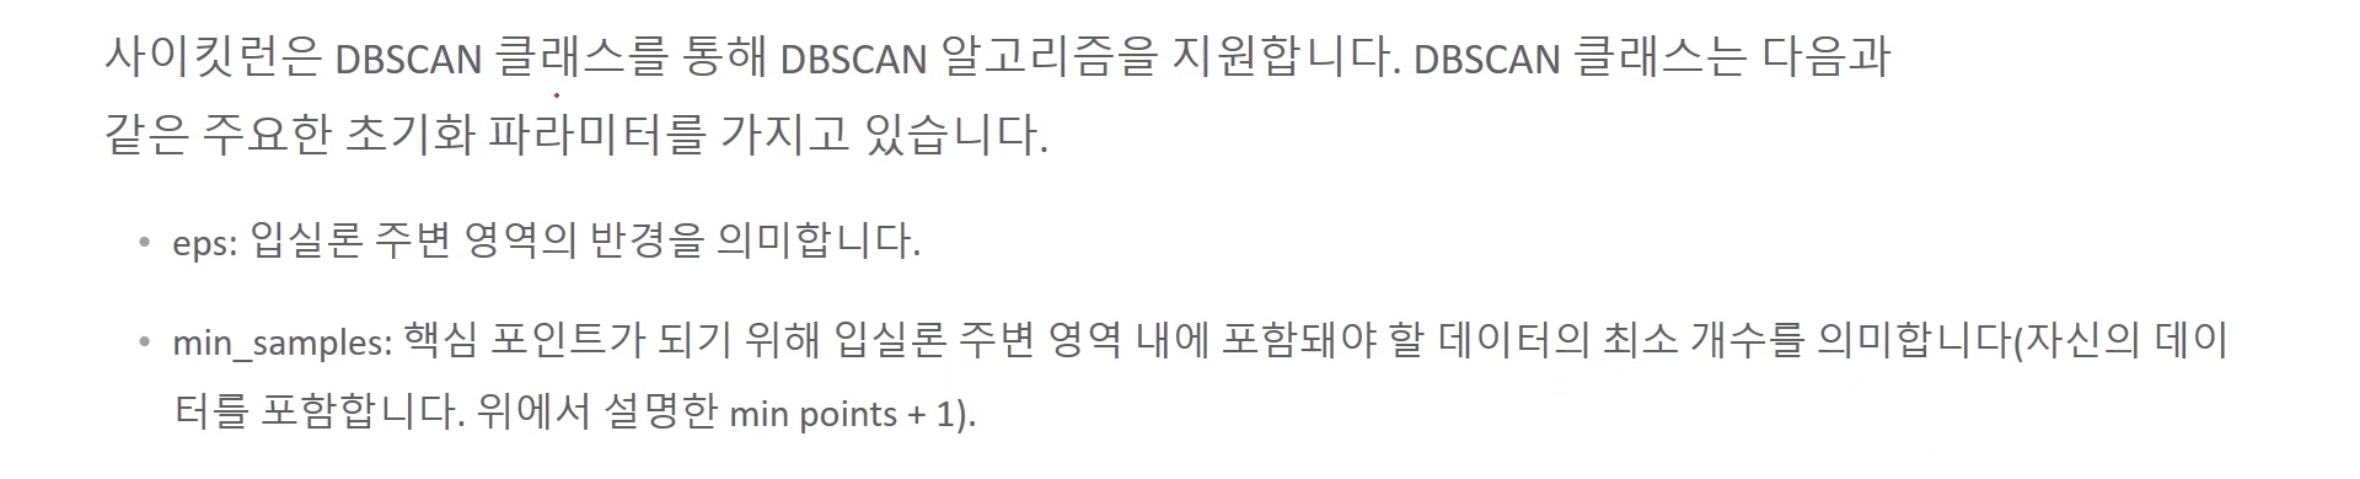

In [1]:
from sklearn.datasets import load_iris 

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
%matplotlib inline 

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### eps 0.6 min_samples=8로 DBSCAN 군집화 적용

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean') # metric : 입실론 반경안에 포함되어 있는 데이터들 간의 거리 측정
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels 

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

## -1: Noise 

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [6]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

#### PCA 2개 컴포넌트로 기존 feature들을 차원 축소 후 시각화

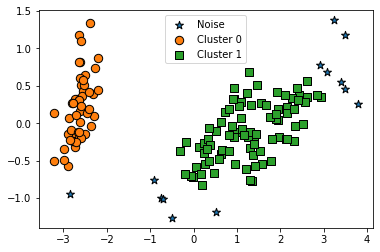

In [7]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

#### eps의 크기를 증가 한 후 노이즈 확인

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


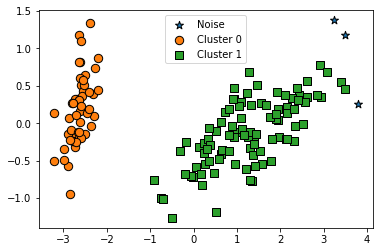

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

#### min_samples의 크기를 증가 후 노이즈 확인

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


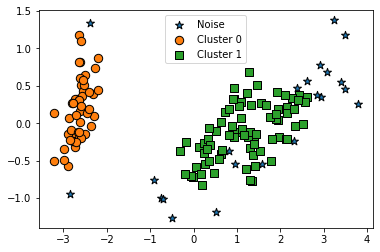

In [9]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

## DBSCAN 적용하기 – make_circles() 데이터 세트

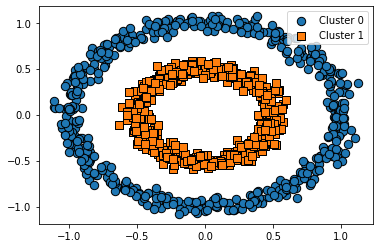

In [11]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

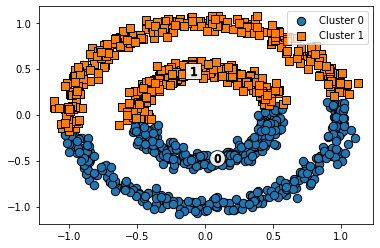

In [13]:
# KMeans로 make_circles() 데이터 셋을 클러스터링 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

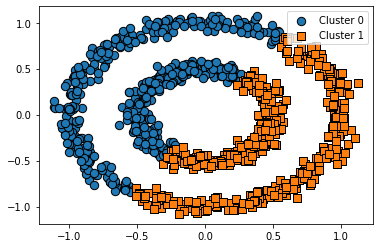

In [15]:
# GMM으로 make_circles() 데이터 셋을 클러스터링 수행 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X)
clusterDF['gmm_cluster'] = gmm_labels

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

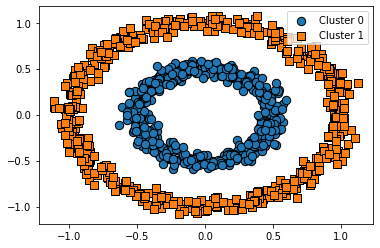

In [17]:
# DBSCAN으로 make_circles() 데이터 셋을 클러스터링 수행 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

## HDBSCAN(Hierarchical DBSCAN)

- DBSCAN과 계층(Hierarchical)적 군집분석 개념을 통합한 기법
- DBSCAN보다 하이퍼 파라미터(eps, min_samples)에 덜 민감함 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]
!pip install hdbscan
import hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp39-cp39-macosx_10_9_x86_64.whl size=658502 sha256=4c95abe615d9459fd126e5c3af16e1930417612fe96219c7069b82b8fc69a9d6
  Stored in directory: /Users/isubin/Library/Caches/pip/wheels/97/2d/1e/d9907e8f806ee949f9effc41004d7f32e862f6f67d9157812d
Successfully built hdbscan
You should consider upgrading via the '/Users/isubin/opt/anaconda3/bin/python3.9 -m pip install --upgrade pip' command.


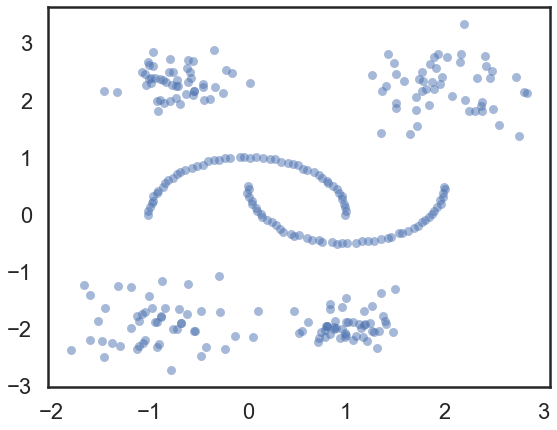

In [3]:
num=100
moons, _ = data.make_moons(n_samples=num, noise=0.01)
blobs, _ = data.make_blobs(n_samples=num, centers=[(-0.75,2.25), (1.0, -2.0)], cluster_std=0.25)
blobs2, _ = data.make_blobs(n_samples=num, centers=[(2,2.25), (-1, -2.0)], cluster_std=0.4)
test_data = np.vstack([moons, blobs,blobs2])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)
plt.show()

In [4]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

<AxesSubplot:>

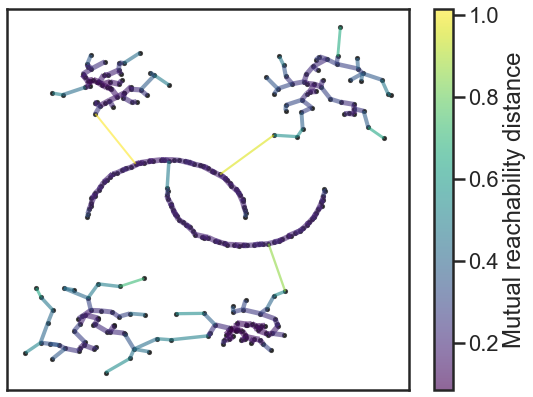

In [5]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=10, 
                                      edge_linewidth=2)

<AxesSubplot:ylabel='distance'>

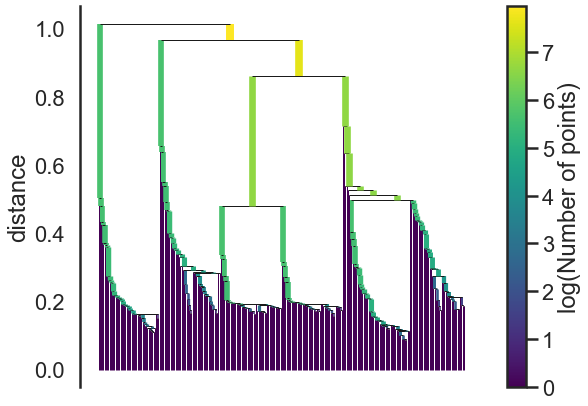

In [6]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

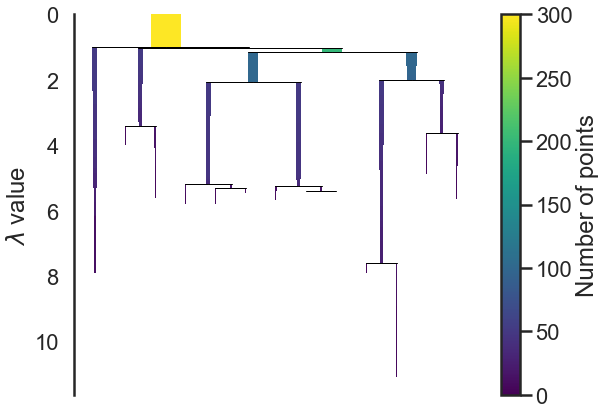

In [7]:
clusterer.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

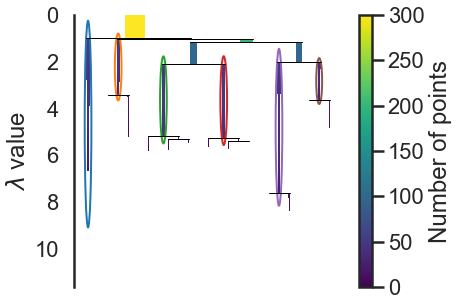

In [11]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

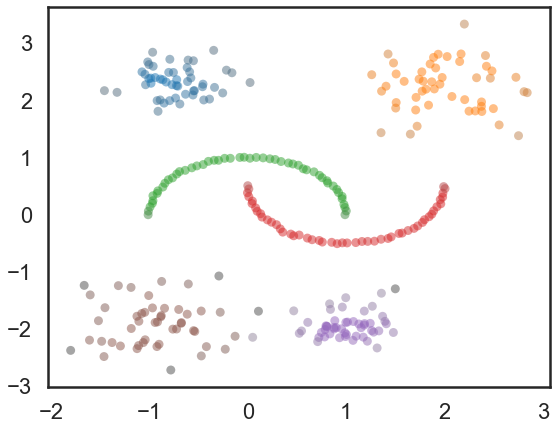

In [8]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.3,0.3,0.3) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

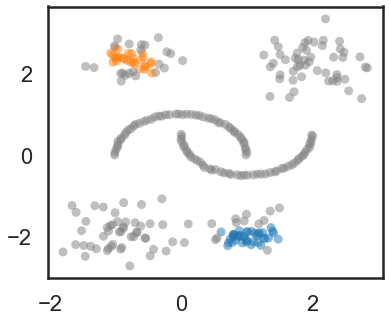

In [9]:
from sklearn.cluster import DBSCAN
plt.rcParams["figure.figsize"] = [6,5]
db = DBSCAN(eps=0.2, min_samples=10).fit(test_data)

palette = sns.color_palette()
cluster_colors = [palette[col]
                  if col >= 0 else (0.5, 0.5, 0.5) for col in
                  db.labels_]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

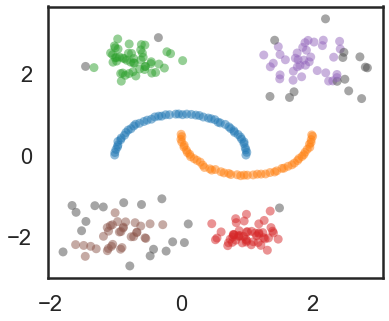

In [10]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.35, min_samples=10).fit(test_data)

palette = sns.color_palette()
cluster_colors = [palette[col]
                  if col >= 0 else (0.3,0.3,0.3) for col in
                  db.labels_]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)